In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, train_test_split

# **4. 데이터 전처리**

In [2]:
# Load Data
data = pd.read_csv("master.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


### **4-a. Data Restructuring (데이터 재구조화)**

#### **Table Decomposition**

In [3]:
# Delete duplicate attribute: "suicides_no", "population"
# "suicides/100k pop" * 10^5 = "suicides_no" / "population" 
data.drop("suicides_no", axis = 1, inplace = True)
data.drop("population", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year ($)    27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.1+ MB
None


In [4]:
# Delete duplicate attribute: "country-year"
# "country" and "year" attributes also exist separately
data.drop("country-year", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   HDI for year        8364 non-null   float64
 6   gdp_for_year ($)    27820 non-null  object 
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB
None


In [5]:
# Delete duplicate attribute: "gdp_for_year ($)"
# "gdp_for_year ($)" is proportional to "gdp_per_capita ($)"
data.drop("gdp_for_year ($)", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   HDI for year        8364 non-null   float64
 6   gdp_per_capita ($)  27820 non-null  int64  
 7   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB
None


### **관련 설명**
#### **"suicides_no", "population" 제거**
`suicides/100k pop` 컬럼은 `suicides_no`를 *population*으로 나눈 후에 *100,000*을 곱한 값이다. 따라서 `suicides_no`와 *population*은 `suicides/100k pop`를 통해 이미 표현되고 있어서, 이 두 컬럼은 중복 정보를 제공하며, 데이터셋의 차원을 줄이기 위해 제거한다.
<br>

#### **"country-year" 제거**
`country-year`는 **country**와 **year**의 결합된 정보를 제공하는 컬럼이다. 개별 컬럼을 사용하는 것이 데이터 처리에 더 유연하며, 필요한 경우 언제든지 이 두 속성을 결합하여 동일한 정보를 재생성할 수 있다.
<br>

#### **"gdp_for_year ($)" 제거**
`gdp_for_year ($)`는 **국가의 연간 총 GDP**를 나타내고, `gdp_per_capita ($)`는 **인구 대비 GDP**를 나타낸다. 이 두 값은 서로 비례 관계에 있으므로 **국가의 총 GDP**는 *인구 수*와 *1인당 GDP*의 곱으로 계산될 수 있다. 이런 경우 `gdp_for_year ($)`는 `gdp_per_capita ($)`와 인구 데이터를 통해 추론할 수 있으므로, 중복되는 정보를 제공하고 데이터셋의 복잡성을 불필요하게 증가시킬 수 있어 제거한다.

### **4-b. Data Value Changes(데이터 값 변환)**

#### **Cleaning dirty data**

In [6]:
# Check missing values in original dataset
print("Original Dataset:")
print(data.isnull().sum())

Original Dataset:
country                   0
year                      0
sex                       0
age                       0
suicides/100k pop         0
HDI for year          19456
gdp_per_capita ($)        0
generation                0
dtype: int64


In [7]:
# Determine what percentage is missing : 69.94%
missing_value = sum(pd.isnull(data["HDI for year"]))/len(data["HDI for year"])
print(f"Percentage of missing value of \"HDI for year\": {missing_value * 100:.2f}%\n")

# Delete missing attribute: "HDI for year"
data.drop("HDI for year", axis = 1, inplace = True)

print(data.info())

Percentage of missing value of "HDI for year": 69.94%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   gdp_per_capita ($)  27820 non-null  int64  
 6   generation          27820 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB
None


### **관련 설명**
데이터셋에서 각 컬럼별로 누락된 값의 수를 계산하여, `HDI for year`컬럼의 누락된 값의 수가 같은 컬럼 내의 전체 데이터의 70%에 달하는 걸 도출했다. -> `HDI for year` 컬럼 삭제


#### **Text preprocessing**

In [8]:
# Remove 'years' text
data["age"] = data["age"].str.strip(" years")

print(data['age'])

0        15-24
1        35-54
2        15-24
3          75+
4        25-34
         ...  
27815    35-54
27816      75+
27817     5-14
27818     5-14
27819    55-74
Name: age, Length: 27820, dtype: object


### **관련 설명**
`age` 컬럼에 **years** 텍스트를 제거한다

#### **Data discretization**

In [9]:
# Change the string of the age to an integer

# Define the function to convert age strings to integers
def convert_age(age):
    if '75+' in age:
        return 80
    elif '55-74' in age:
        return 65
    elif '35-54' in age:
        return 45
    elif '25-34' in age:
        return 30
    elif '15-24' in age:
        return 20
    elif '5-14' in age:
        return 10
    else:
        return None

# Apply the function to the 'age' column in both train and test datasets
data['age'] = data['age'].apply(convert_age)

# Verify the changes by grouping by age and calculating the mean suicide rate
age_grouped = data[['age', 'suicides/100k pop']].groupby('age', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Display the results
print(data['age'])

0        20
1        45
2        20
3        80
4        30
         ..
27815    45
27816    80
27817    10
27818    10
27819    65
Name: age, Length: 27820, dtype: int64


### **관련 설명**
데이터 타입을 **object타입**에서 **int타입**으로 바꾸고, 각 연령대의 *중간값*으로 인코딩했다. 

#### **Encoding for data mining algorighoms**

In [10]:
# Pre-processing sex property using label encoding

# Define the mapping function using map
sex_mapping = {'female': 0, 'male': 1}

data['sex'] = data['sex'].map(sex_mapping)

# Verify the changes by grouping by sex and calculating the mean suicide rate
sex_grouped = data[['sex', 'suicides/100k pop']].groupby('sex', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Display the results
print(data['sex'])

0        1
1        1
2        0
3        1
4        1
        ..
27815    0
27816    0
27817    1
27818    0
27819    0
Name: sex, Length: 27820, dtype: int64


### **관련 설명**
**라벨 인코딩**을 사용하여 **남자**는 **1**, **여자**는 **0**으로 변환하였다

In [11]:
# Pre-processing generation property using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['generation'])

# Extract the column names generated by one-hot encoding
one_hot_columns = [col for col in data_encoded.columns if 'generation_' in col]

# Add one-hot encoded columns to the original data frame
data = data.join(data_encoded[one_hot_columns])

# Drop the original 'generation' column
data.drop(columns=['generation'], inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     27820 non-null  object 
 1   year                        27820 non-null  int64  
 2   sex                         27820 non-null  int64  
 3   age                         27820 non-null  int64  
 4   suicides/100k pop           27820 non-null  float64
 5   gdp_per_capita ($)          27820 non-null  int64  
 6   generation_Boomers          27820 non-null  bool   
 7   generation_G.I. Generation  27820 non-null  bool   
 8   generation_Generation X     27820 non-null  bool   
 9   generation_Generation Z     27820 non-null  bool   
 10  generation_Millenials       27820 non-null  bool   
 11  generation_Silent           27820 non-null  bool   
dtypes: bool(6), float64(1), int64(4), object(1)
memory usage: 1.4+ MB
None


### **4-c. Feature Engineering(특성 엔지니어링)**

#### **Feature Creation**

In [12]:
# Calculate the mean suicide rate
mean_suicide_rate = data["suicides/100k pop"].mean()
threshold = mean_suicide_rate

# Create a new attribute, Over_threshold_suicides
# 1 if the suicide rate is higher than the mean suicide rate, 0 otherwise
data["Over_threshold_suicides"] = np.where(data["suicides/100k pop"] > threshold, 1, 0)

# Print the updated DataFrame information to see the new attribute and changes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     27820 non-null  object 
 1   year                        27820 non-null  int64  
 2   sex                         27820 non-null  int64  
 3   age                         27820 non-null  int64  
 4   suicides/100k pop           27820 non-null  float64
 5   gdp_per_capita ($)          27820 non-null  int64  
 6   generation_Boomers          27820 non-null  bool   
 7   generation_G.I. Generation  27820 non-null  bool   
 8   generation_Generation X     27820 non-null  bool   
 9   generation_Generation Z     27820 non-null  bool   
 10  generation_Millenials       27820 non-null  bool   
 11  generation_Silent           27820 non-null  bool   
 12  Over_threshold_suicides     27820 non-null  int32  
dtypes: bool(6), float64(1), int32(1

In [13]:
# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=33)

# Prepare the new encoded column
data['country_encoded'] = 0.0

# Perform target encoding using KFold
for train_index, val_index in kf.split(data):
    train_fold, val_fold = data.iloc[train_index], data.iloc[val_index]
    mean_encoded = train_fold.groupby('country')['suicides/100k pop'].mean()
    data.loc[val_index, 'country_encoded'] = val_fold['country'].map(mean_encoded)

# Split the data into training and testing datasets
# Normally done for dividing data, but here it is used as an example to split part of the data arbitrarily
train_data = data.sample(frac=0.8, random_state=33)
test_data = data.drop(train_data.index)

# Use mean encoding for the test dataset
# Use the mean calculated from the entire dataset
global_mean = data['suicides/100k pop'].mean()
data['country_encoded'].fillna(global_mean, inplace=True)

# Drop the original 'country' column
data.drop(columns=['country'], inplace=True)

# Print the results
print("Data with Target Encoding on 'country':")
print(data['country_encoded'])


Data with Target Encoding on 'country':
0        3.494650
1        3.526042
2        3.460366
3        3.502403
4        3.494650
           ...   
27815    8.094891
27816    8.334615
27817    8.094891
27818    7.885556
27819    8.150212
Name: country_encoded, Length: 27820, dtype: float64


C:\TempFolder\ipykernel_10780\1141463371.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country_encoded'].fillna(global_mean, inplace=True)


새로운 속성 `Over_threshold_suicides` 생성: 이 속성은 `suicides/100k pop`이 **threshold**를 초과하는지 여부를 확인하여, 0과 1로 표기한다

`KFold 교차 검증`을 통한 **타깃 인코딩**: 각 국가별로 `suicides/100k pop`의 평균을 계산하고, 이를 각 검증 세트에 메핑하여 **국가별 자살률의 평균**으로 새로운 컬럼 `country_encoded`를 만든다

### **4-d. Data Reduction(데이터 축약)**

#### **Data Filtering**

In [14]:
# Split the entire dataset into training and testing data with a 70:30 ratio
train_data, test_data = train_test_split(data, test_size=0.3, random_state=33)

# Use the properties we created ('Over_threshold_suicides') as predictions
# Remove 'suicides/100k pop', a factor that affects prediction

# Ensure that all necessary columns are present and no unnecessary columns are dropped
columns_to_drop = ["Over_threshold_suicides", "suicides/100k pop"]

# Drop columns in a single operation for both train and test sets
X_train = train_data.drop(columns=columns_to_drop)
Y_train = train_data["Over_threshold_suicides"]

X_test = test_data.drop(columns=columns_to_drop).copy()
Y_test = test_data["Over_threshold_suicides"]

# Print the shapes of X_train, Y_train, and X_test to verify
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (19474, 11)
Y_train shape: (19474,)
X_test shape: (8346, 11)
Y_test shape: (8346,)


#### **관련 해설**
전체 데이터 셋을 훈련 데이터와 테스트 데이터로 **7:3 비율**로 분할한다. `Over_threshold_suicides` 속성을 예측 변수로 사용하며, 예측에 영향을 줄 수 있는 `suicides/100k pop` 컬럼은 제거한다

In [15]:
print("data shape: ", data.shape, "\n")
print(data.info())

data shape:  (27820, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        27820 non-null  int64  
 1   sex                         27820 non-null  int64  
 2   age                         27820 non-null  int64  
 3   suicides/100k pop           27820 non-null  float64
 4   gdp_per_capita ($)          27820 non-null  int64  
 5   generation_Boomers          27820 non-null  bool   
 6   generation_G.I. Generation  27820 non-null  bool   
 7   generation_Generation X     27820 non-null  bool   
 8   generation_Generation Z     27820 non-null  bool   
 9   generation_Millenials       27820 non-null  bool   
 10  generation_Silent           27820 non-null  bool   
 11  Over_threshold_suicides     27820 non-null  int32  
 12  country_encoded             27820 non-null  float64
dtypes: b

### **1. [Classification] Logistic Regression**
선형 분류기로, 결과가 **범주형 데이터**인 경우에 적합하다. *이진* 또는 *다중* 클래스 분류 문제에 주로 사용된다.

Training Accuracy:  86.202
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     13392
           1       0.80      0.75      0.77      6082

    accuracy                           0.86     19474
   macro avg       0.84      0.83      0.84     19474
weighted avg       0.86      0.86      0.86     19474



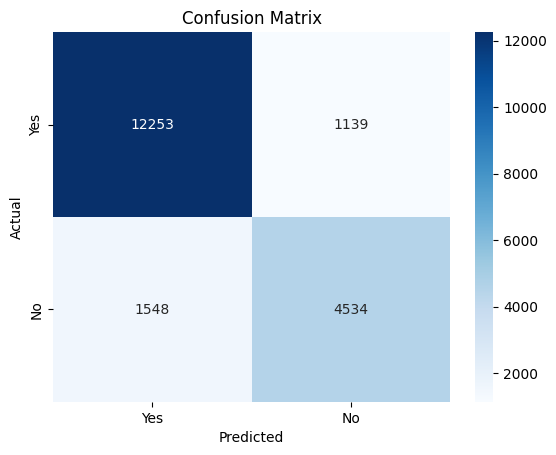

K-Fold Cross-Validation Scores: [0.85164271 0.85882957 0.86601643 0.86088296 0.86132512 0.86902928
 0.86389317 0.8751926  0.86646122 0.84643041]
Average 10-Fold CV Score: 0.862, with a standard deviation of 0.008
Precision: 0.799, Recall: 0.745, F1-Score: 0.771


In [16]:
# 1. Logistic Regression Model
logreg = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))

# Train the model
logreg.fit(X_train, Y_train)

# Predict on the training set and calculate accuracy
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_log)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, logreg.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, logreg.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")


### **Logistic Regression 모델 평가**

### 1. Training Accuracy

- **훈련 정확도**: **86.202%**
    - 이 모델은 훈련 데이터에 대해 `약 86%`의 정확도로 올바른 예측을 수행했다. 일반적으로 높은 훈련 정확도는 모델이 데이터를 잘 학습했다는 지표이지만, **과적합 여부**를 추가로 확인할 필요가 있다.

### 2. Classification Report

- **정밀도(Precision)**, **재현율(Recall)**, **F1-Score**
    - **클래스 0 (양성)**
        - **정밀도**: *0.89* - 모델이 예측한 'Yes' 중 `89%`가 실제로 'Yes'
        - **재현율**: *0.91* - 실제 'Yes' 중 `91%`를 모델이 'Yes'로 정확히 예측
        - **F1-Score**: *0.90* - **정밀도**와 **재현율**의 조화 평균
    - **클래스 1 (음성)**
        - **정밀도**: *0.80* - 모델이 예측한 'No' 중 `80%`가 실제로 'No'
        - **재현율**: *0.75* - 실제 'No' 중 `75%`를 모델이 'No'로 정확히 예측
        - **F1-Score**: *0.77* - `정밀도`와 `재현율`의 조화 평균
    - 이 모델은 `클래스 0(양성)`을 예측하는 데 더 **정확**하고 **일관성** 있는 성능을 보이며, `클래스 1(음성)`에 대해서는 다소 **낮은 성능**을 보인다.

### 3. K-Fold Cross-Validation

- **교차 검증 점수**: **평균** *0.862*, **표준편차** *0.008*
    - 교차 검증을 통한 모델의 일반화 가능성 평가에서 모델은 `약 86%`의 **평균 정확도**를 보여주며, 비교적 낮은 `**`표준 편차(0.008)`는 모델 성능의 안정성을 나타낸다.
    - 이는 모델이 다양한 **하위 데이터셋**에서도 일관된 성능을 유지할 수 있음을 보여준다.

### 4. 다양한 교차 검증 지표

- **정밀도**: *0.799*
- **재현율**: *0.745*
- **F1-Score**: *0.771*
    - **교차 검증** 결과, **정밀도**와 **재현율**의 값이 전체적으로 줄어들었기 때문에, 모델이 모든 *클래스*를 공평하게 잘 처리하고 있지 않다는 점을 알 수 있다. 특히 어떤 *클래스*는 잘 예측하지만 다른 *클래스*는 그렇지 못할 수 있다는 점을 시사한다.

**`분석 결과, 로지스틱 회귀 모델은 전반적으로 훈련 데이터에 대해 비교적 높은 성능을 보이나, 교차 검증을 통한 평가에서는 성능이 다소 감소하는 경향을 보였다. 특히 음성 클래스에 대한 예측이 양성 클래스에 대한 예측보다 개선이 필요함을 보여준다. 자살률을 예측하는 모델로는 좋지 않은 결과라고 분석할 수 있기 때문에 개선의 여지가 있어 보인다.`**

### **2. [Classification] Decision Tree**
직관적인 모델로, 데이터를 **트리 구조**의 집합으로 분할하여 결정을 내리는 방식을 사용한다. 해석이 *쉽고* *다목적으로 활용* 가능하다

Training Accuracy:  100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13392
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     19474
   macro avg       1.00      1.00      1.00     19474
weighted avg       1.00      1.00      1.00     19474



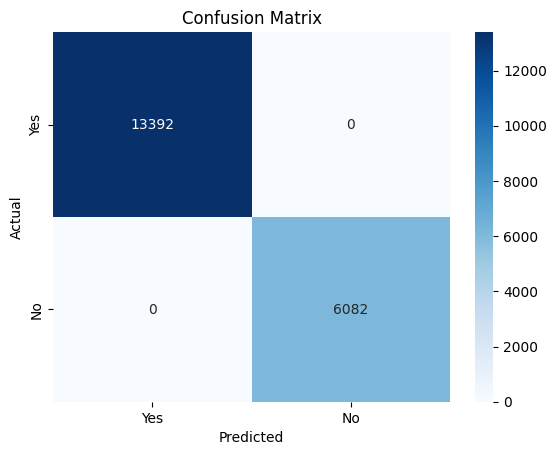

K-Fold Cross-Validation Scores: [0.90297741 0.91067762 0.91735113 0.91427105 0.91114535 0.90755008
 0.91011813 0.91268618 0.91987673 0.90909091]
Average 10-Fold CV Score: 0.912, with a standard deviation of 0.005
Precision: 0.856, Recall: 0.862, F1-Score: 0.859


In [17]:
# 2. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=33)
decision_tree.fit(X_train, Y_train)

# Predict on the training set
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_decision_tree)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, decision_tree.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, decision_tree.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **Decision Tree 모델 평가**

#### 1. Training Accuracy

- **훈련 정확도**: **100.0%**
  - 이 모델은 훈련 데이터에 대해 `완벽하게` 적합되었음을 나타내며, 모든 데이터 포인트를 정확하게 분류했다. 이는 일반적으로 **과적합**을 의미할 수 있다.

#### 2. Classification Report

- **정밀도(Precision)**, **재현율(Recall)**, **F1-Score**:
  - **클래스 0 (양성)**:
    - **정밀도**: *1.00* - 모든 'Yes' 예측이 정확
    - **재현율**: *1.00* - 모든 실제 'Yes'를 정확히 예측
    - **F1-Score**: *1.00* - **정밀도**와 **재현율**의 완벽한 조화
  - **클래스 1 (No)**:
    - **정밀도**: *1.00* - 모든 'No' 예측이 정확
    - **재현율**: *1.00* - 모든 실제 'No'를 정확히 예측
    - **F1-Score**: *1.00* - **정밀도**와 **재현율**의 완벽한 조화
  - 이러한 `완벽한 메트릭`은 모델이 훈련 데이터에 **과적합**됐을 가능성을 시사한다.

#### 3. K-Fold Cross-Validation

- **교차 검증 점수**: **평균** *0.912*, **표준 편차**: *0.005*
  - 교차 검증 결과는 훈련 정확도에 비해 `낮으며`, 이는 모델이 훈련 데이터에 **과적합**되었을 가능성을 다시 한 번 시사한다.

#### 4. 다양한 교차 검증 지표

- **정밀도(Precision)**: *0.856*
- **재현율(Recall)**: *0.862*
- **F1-Score**: *0.859*
  - 추가 **교차 검증** 메트릭은 좋은 성능을 보이지만, 완벽한 훈련 데이터 성능에는 미치지 못했다. 이는 모델이 실제 환경에서도 `어느 정도 잘 수행`될 수 있음을 나타내지만, 완벽한 훈련 성능에는 미치지 못하는 결과이다.

**`분석 결과, Decision Tree 모델은 훈련 데이터에 완벽하게 적합되었으나, 교차 검증을 통한 평가에서는 성능이 다소 감소하는 경향을 보였다. 특히, 과적합의 가능성을 감안할 때 실제 환경에서의 성능은 훈련 성능만큼 높지 않을 수 있다.`**


### **3. [Classification] K-Nearest Neighbors (KNN)**
인스턴스 기반 학습 알고리즘으로, 가장 가까운 *K*개의 이웃 데이터를 바탕으로 분류 또는 회귀를 수행한다. 데이터가 **적을 때** 유용하다

Training Accuracy:  86.752
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     13392
           1       0.83      0.72      0.77      6082

    accuracy                           0.87     19474
   macro avg       0.86      0.83      0.84     19474
weighted avg       0.87      0.87      0.86     19474



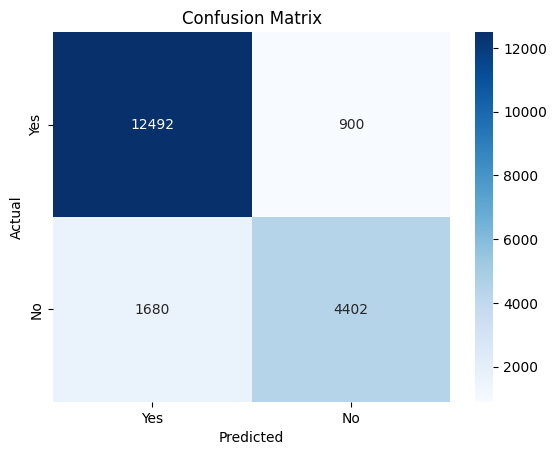

K-Fold Cross-Validation Scores: [0.70225873 0.70123203 0.69969199 0.69712526 0.67950693 0.69491525
 0.69440164 0.70724191 0.71751412 0.71032357]
Average 10-Fold CV Score: 0.700, with a standard deviation of 0.010
Precision: 0.523, Recall: 0.452, F1-Score: 0.485


In [18]:
# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict on the training set
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_knn)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, knn.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, knn.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **K-Nearest Neighbors (KNN) 모델 평가**
#### 1. Training Accuracy
- **훈련 정확도**: **86.752%**
  - 이 모델은 훈련 데이터에 대해 `약 87%`의 정확도로 올바른 예측을 수행했습니다. 이는 모델이 데이터의 패턴을 비교적 잘 학습하고 있음을 보여준다.

#### 2. Classification Report
- **정밀도(Precision)**, **재현율(Recall)**, **F1-Score**:
  - **클래스 0 (양성)**:
    - **정밀도**: *0.88* - 예측된 'Yes' 중 `88%`가 실제로 'Yes'
    - **재현율**: *0.93* - 실제 'Yes' 중 `93%`가 정확히 예측됨
    - **F1-Score**: *0.91* - 정밀도와 재현율의 조화 평균
  - **클래스 1 (음성)**:
    - **정밀도**: *0.83* - 예측된 'No' 중 `83%`가 실제로 'No'
    - **재현율**: *0.72* - 실제 'No' 중 `72%`가 정확히 예측됨
    - **F1-Score**: *0.77* - 정밀도와 재현율의 조화 평균
  - 이 모델은 `클래스 0(양성)`을 보다 효과적으로 예측하고 있으며, `클래스 1(음성)`의 예측에 있어서는 **다소 개선**이 필요함을 보여준다.

#### 3. K-Fold Cross-Validation
- **교차 검증 점수**: **평균**: *0.700*, **표준편차**: *0.010*
  - 교차 검증 결과는 모델이 새로운 데이터에 대해 `일관성이 다소 떨어지며`, 전반적으로 훈련 데이터의 성능에 비해 **낮은 일반화 성능**을 보이고 있음을 나타냅니다.

#### 4. 다양한 교차 검증 지표
- **Precision**: *0.523*
- **Recall**: *0.452*
- **F1-Score**: *0.485*
  - 추가적인 **교차 검증** 메트릭은 모델의 **정밀도**, **재현율**, 그리고 **F1 점수**가 상대적으로 `낮음`을 보인다. 이는 모델이 `불균형 데이터`에 대해 어려움을 겪고 있을 수 있으며, 특정 클래스의 예측 개선이 필요함을 시사한다.

**`분석 결과, KNN 모델은 훈련 데이터에 대해 높은 정확도를 보이고 있으나, 추가적인 교차 검증 지표를 통해 확인된 바에 따르면, 모델이 실제 환경에서는 예측 성능이 낮아질 수 있다는 우려가 있다. 특히 클래스 1(음성)의 예측에 있어 개선이 필요하며, 모델의 일반화 능력을 향상시키기 위한 조정이 요구된다.`**

### **4. [Classification] Gaussian Naive Bayes (GNB)**
특성들이 독립적이라는 가정 하에, 각 클래스의 조건부 확률을 계산하여 분류를 수행하는 **확률적 모델**이다. *큰 데이터셋*과 *텍스트 데이터*에 잘 맞습니다.

Training Accuracy:  82.433
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     13392
           1       0.79      0.60      0.68      6082

    accuracy                           0.82     19474
   macro avg       0.81      0.76      0.78     19474
weighted avg       0.82      0.82      0.82     19474



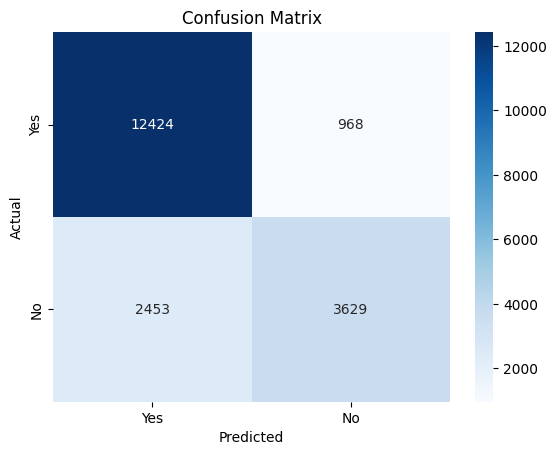

K-Fold Cross-Validation Scores: [0.81160164 0.82546201 0.82443532 0.82032854 0.81510015 0.82074987
 0.82742681 0.83307653 0.83102209 0.83050847]
Average 10-Fold CV Score: 0.824, with a standard deviation of 0.007
Precision: 0.789, Recall: 0.596, F1-Score: 0.679


In [19]:
# 4. Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

# Predict on the training set
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_gaussian)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, gaussian.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, gaussian.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **Gaussian Naive Bayes (GNB) Model Evaluation**

#### 1. Training Accuracy
- **훈련 정확도**: **82.433%**
  - 이 모델은 훈련 데이터에 대해 `약 82%`의 정확도로 올바른 예측을 수행했다. 이는 데이터의 패턴을 어느 정도 학습했으나 개선의 여지가 있음을 나타낸다.

#### 2. Classification Report
- **정밀도(Precision)**, **재현율(Recall)**, **F1-Score**:
  - **클래스 0 (양성)**:
    - **정밀도**: *0.84* - 예측된 'Yes' 중 `84%`가 실제로 'Yes'
    - **재현율**: *0.93* - 실제 'Yes' 중 `93%`가 정확히 예측됨
    - **F1-Score**: *0.88* - 정밀도와 재현율의 조화 평균
  - **클래스 1 (음성)**:
    - **정밀도**: *0.79* - 예측된 'No' 중 `79%`가 실제로 'No'
    - **재현율**: *0.60* - 실제 'No' 중 `60%`가 정확히 예측됨
    - **F1-Score**: *0.68* - 정밀도와 재현율의 조화 평균
  - 이 결과는 모델이 `클래스 0 (양성)`의 예측에 더 강하며 `클래스 1 (음성)`의 예측 성능은 상대적으로 **약함**을 나타낸다.

#### 3. K-Fold Cross-Validation
- **교차 검증 점수**: **평균**: *0.824*, **표준편차**: *0.007*
  - 교차 검증 결과는 훈련 데이터의 성능과 `유사하여`, 이는 모델이 다양한 하위 데이터셋에서 일관성 있는 성능을 보임을 시사한다.

#### 4. 다양한 교차 검증
- **Precision**: *0.789*
- **Recall**: *0.596*
- **F1-Score**: *0.679*
  - 추가적인 **교차 검증** 메트릭은 모델의 **정밀도**, **재현율**, 그리고 **F1 점수**가 전반적으로 `낮은` 편이며, 특히 **클래스 1 (음성)**에 대한 재현율이 낮아 이에 대한 개선이 필요함을 보여준다.

**`분석 결과, Gaussian Naive Bayes 모델은 전반적으로 괜찮은 정확도를 보이고 있으나, 교차 검증 지표를 통해 클래스 1 (음성)에 대한 예측 성능이 상대적으로 낮은 것을 확인할 수 있다. 모델의 일반화 능력과 특히 클래스 1 (음성)의 예측 개선을 위한 조정이 필요해 보인다.`**


### **5. [Classification] Random Forest**
**결정 트리**의 **앙상블**로, 각 트리가 서로 다른 데이터 샘플로부터 학습되며, 그 결과를 종합하여 보다 정확한 예측을 도모한다. **과적합**을 **방지**하고 *일반화 성능*을 높이는 데 효과적이다.

Training Accuracy:  100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13392
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     19474
   macro avg       1.00      1.00      1.00     19474
weighted avg       1.00      1.00      1.00     19474



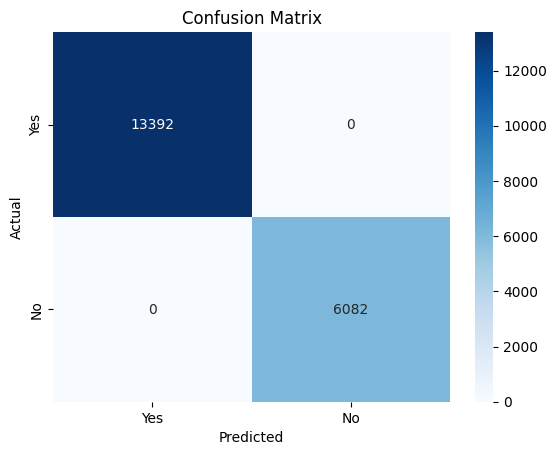

K-Fold Cross-Validation Scores: [0.91889117 0.91786448 0.92761807 0.92761807 0.92758089 0.92193118
 0.92398562 0.93117617 0.93014895 0.92347201]
Average 10-Fold CV Score: 0.925, with a standard deviation of 0.004
Precision: 0.887, Recall: 0.871, F1-Score: 0.879


In [20]:
# 5. Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=33)
random_forest.fit(X_train, Y_train)

# Predict on the training set
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_random_forest)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, random_forest.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, random_forest.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **Random Forest 모델 평가**

#### 1. Training Accuracy
- **훈련 정확도**: **100.0%**
  - 이 모델은 훈련 데이터에 대해 `완벽한 정확도`를 보여준다. 이는 모델이 훈련 데이터에 **과적합**될 가능성이 있음을 나타낸다.

#### 2. Classification Report
- **정밀도(Precision)**, **재현율(Recall)**, **F1-Score**:
  - **클래스 0 (양성)**:
    - **정밀도**: *1.00* - 예측된 'Yes' 중 `100%`가 실제로 'Yes'
    - **재현율**: *1.00* - 실제 'Yes' 중 `100%`가 정확히 예측됨
    - **F1-Score**: *1.00* - 정밀도와 재현율의 완벽한 조화
  - **클래스 1 (음성)**:
    - **정밀도**: *1.00* - 예측된 'No' 중 `100%`가 실제로 'No'
    - **재현율**: *1.00* - 실제 'No' 중 `100%`가 정확히 예측됨
    - **F1-Score**: *1.00* - 정밀도와 재현율의 완벽한 조화
  - 이 결과는 모델이 훈련 데이터에 대해서는 `완벽한 성능`을 보이고 있다.


#### 3. K-Fold Cross-Validation
- **교차 검증 점수**: **평균**: *0.925*, **표준 편차**: *0.004*
  - 교차 검증 결과는 훈련 데이터의 성능에 비해 `약간 낮으나`, 여전히 `매우 높은 정확도`를 보이고 있다. 이는 모델이 **일반화**에 있어 **강한 성능을 유지**할 가능성이 있음을 나타낸다.

#### 4. 다양한 교차 검증
- **Precision**: *0.887*
- **Recall**: *0.871*
- **F1-Score**: *0.879*
  - 추가적인 **교차 검증** 메트릭은 모델이 **클래스 0 (양성)** 및 **클래스 1 (음성)** 클래스를 `효과적`으로 구분할 수 있음을 보여줍니다. 그러나 훈련 데이터의 완벽한 성능에 비해 약간 낮은 결과는 특정 조건 하에서 성능 변동을 나타낼 수 있음을 시사한다.

**`분석 결과, Random Forest 모델은 훈련 데이터에 대해 완벽하게 적합되었으나, 교차 검증을 통한 평가에서는 성능이 다소 감소하는 경향을 보였다. 이는 모델의 과적합 가능성을 감안할 때, 실제 환경에서의 성능은 훈련 성능만큼 높지 않을 수 있다. 따라서, 모델의 일반화 능력을 향상시키기 위한 추가적인 조정과 검증이 필요합니다.`**
